<h1>                                                ML MINI PROJECT                                                         </h1>
<h2><u>Name:- </u> Nikhelesh Bhattacharyya</h2>
<h3><u>Roll no:- </u> B081 </h3>
<h3> B.Tech CS </h3>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.ensemble import GradientBoostingRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2> EDTA and Data Preprocessing </h2>

<h3> 1. Handling Missing Values </h3>
<p>Eliminate Features with more than 50% Null values</p>
<p>For lesser than 50% replace by mean/median for continuous and NA/None/Default_Value for Categorical</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)


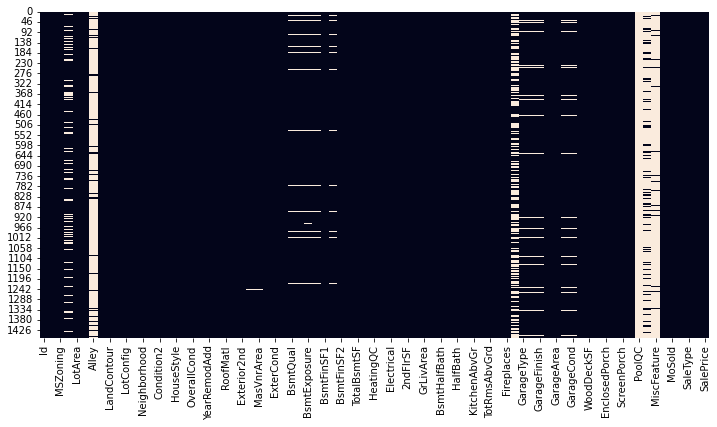

In [4]:
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [5]:
df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','Fence'],1,inplace=True)
Bsmtlist =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
Bsmtlist2=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
Garagelist = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
Bathlist = ['BsmtFullBath', 'BsmtHalfBath']
Extlist = ['Exterior1st', 'Exterior2nd']

df.loc[:, Bsmtlist]=df.loc[:, Bsmtlist].fillna('TA')
df['Electrical']=df['Electrical'].fillna('SBrkr')
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
#df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df.loc[:, Garagelist] = df.loc[:, Garagelist].fillna('NA')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(2005)
df.loc[:, 'MasVnrType'] = df.loc[:, 'MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df.loc[:, Bsmtlist2]=df[Bsmtlist2].fillna(0)
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(0)
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].median())
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].median())
df[Bathlist]=df[Bathlist].fillna(0)

df[Extlist]=df[Extlist].fillna('VinylSd')
df['MSZoning']=df['MSZoning'].fillna('TA')
df['Utilities']=df['Utilities'].fillna('AllPub')
df['KitchenQual']=df['KitchenQual'].fillna('TA')
df['Functional']=df['Functional'].fillna('Typ')
df['SaleType']=df['SaleType'].fillna('WD')

(1460, 76)


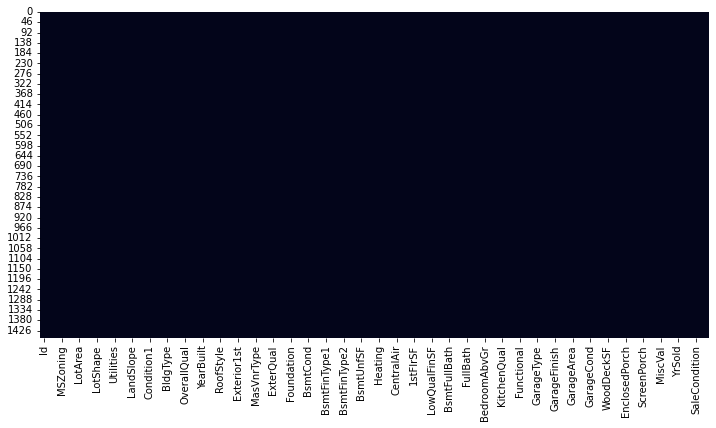

In [6]:
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<h3> Handling Multicollinearity </h3>
<p>Drop the columns which are highly correlated to each other(more than 0.75)</p>

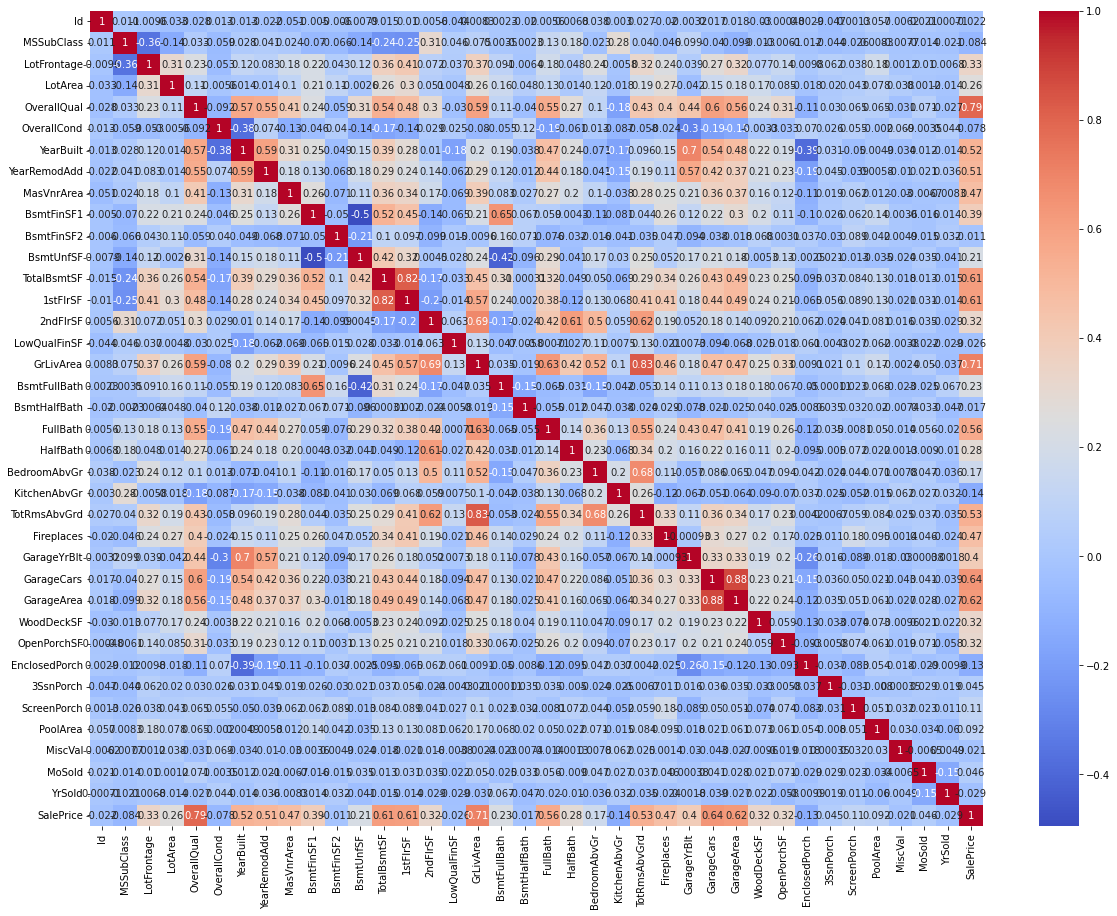

In [8]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [9]:
columnsDrop = ['1stFlrSF','GarageCars','Id']#id is just an unnecessary column hence removing it
df.drop(columnsDrop, axis=1, inplace=True)

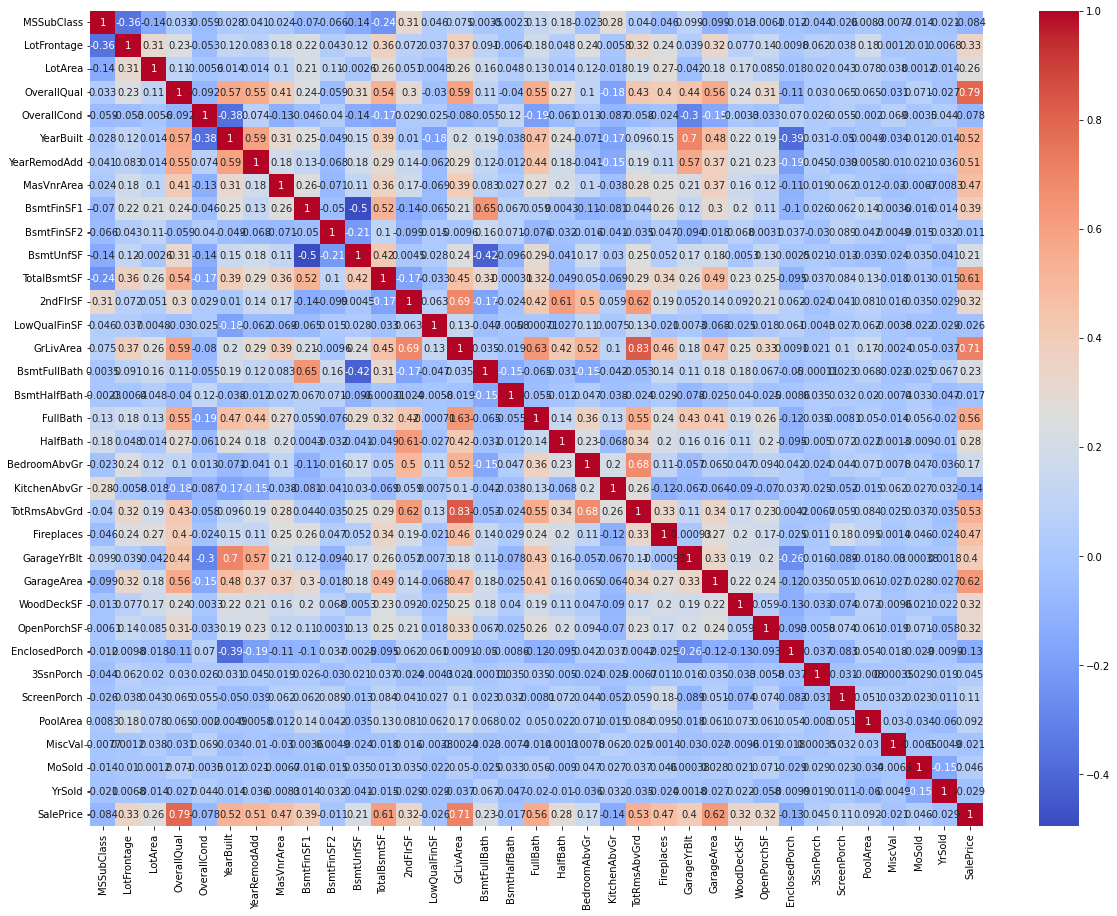

In [10]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

<h3> 3. Outlier Detection </h3>
<p> Use Z- Score for removing outliers </p>

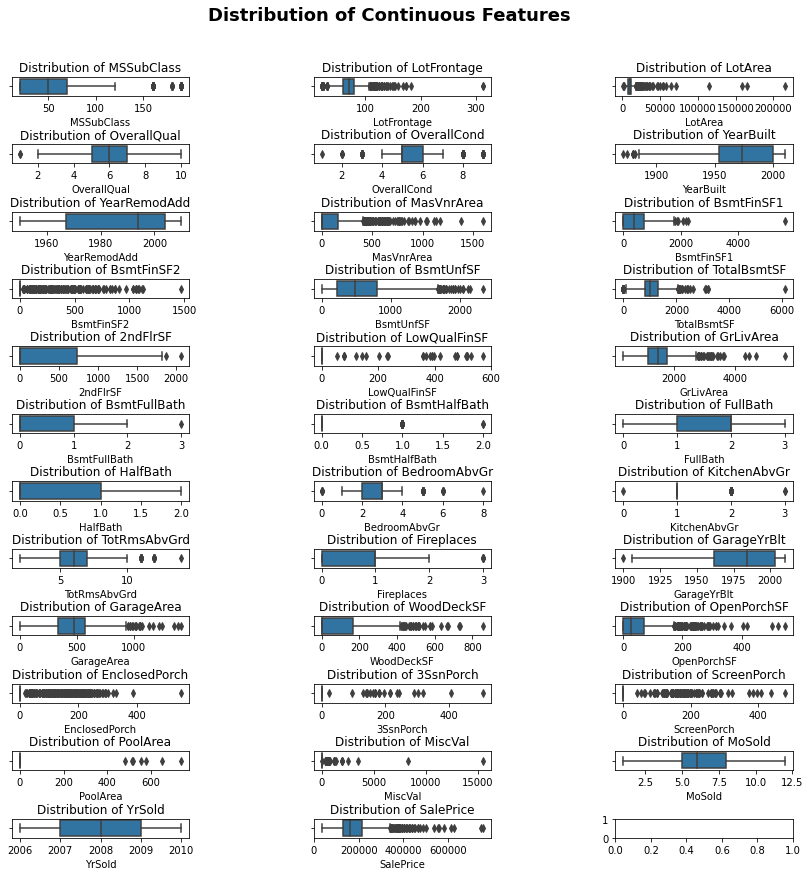

In [11]:
continuous = df.columns[df.dtypes != 'object']
fig, axes = plt.subplots(12,3,figsize=(14,14),constrained_layout=True)
plt.subplots_adjust(wspace=0.7,hspace=2.5)
plt.suptitle("Distribution of Continuous Features",y=0.95,size=18,weight='bold')
ax = sns.boxplot(ax=axes[0,0],data=df,x=continuous[0])
ax.set_title(f'Distribution of {continuous[0]}')
ax1 = sns.boxplot(ax=axes[0,1],data=df,x=continuous[1])
ax1.set_title(f'Distribution of {continuous[1]}')
ax2 = sns.boxplot(ax=axes[0,2],data=df,x=continuous[2])
ax2.set_title(f'Distribution of {continuous[2]}')
ax3 = sns.boxplot(ax=axes[1,0],data=df,x=continuous[3])
ax3.set_title(f'Distribution of {continuous[3]}')
ax4 = sns.boxplot(ax=axes[1,1],data=df,x=continuous[4])
ax4.set_title(f'Distribution of {continuous[4]}')
ax5 = sns.boxplot(ax=axes[1,2],data=df,x=continuous[5])
ax5.set_title(f'Distribution of {continuous[5]}')
ax6 = sns.boxplot(ax=axes[2,0],data=df,x=continuous[6])
ax6.set_title(f'Distribution of {continuous[6]}')
ax7 = sns.boxplot(ax=axes[2,1],data=df,x=continuous[7])
ax7.set_title(f'Distribution of {continuous[7]}')
ax8 = sns.boxplot(ax=axes[2,2],data=df,x=continuous[8])
ax8.set_title(f'Distribution of {continuous[8]}')
ax9 = sns.boxplot(ax=axes[3,0],data=df,x=continuous[9])
ax9.set_title(f'Distribution of {continuous[9]}')
ax10 = sns.boxplot(ax=axes[3,1],data=df,x=continuous[10])
ax10.set_title(f'Distribution of {continuous[10]}')
ax11 = sns.boxplot(ax=axes[3,2],data=df,x=continuous[11])
ax11.set_title(f'Distribution of {continuous[11]}')
ax12 = sns.boxplot(ax=axes[4,0],data=df,x=continuous[12])
ax12.set_title(f'Distribution of {continuous[12]}')
ax13 = sns.boxplot(ax=axes[4,1],data=df,x=continuous[13])
ax13.set_title(f'Distribution of {continuous[13]}')
ax14 = sns.boxplot(ax=axes[4,2],data=df,x=continuous[14])
ax14.set_title(f'Distribution of {continuous[14]}')
ax15 = sns.boxplot(ax=axes[5,0],data=df,x=continuous[15])
ax15.set_title(f'Distribution of {continuous[15]}')
ax16= sns.boxplot(ax=axes[5,1],data=df,x=continuous[16])
ax16.set_title(f'Distribution of {continuous[16]}')
ax17 = sns.boxplot(ax=axes[5,2],data=df,x=continuous[17])
ax17.set_title(f'Distribution of {continuous[17]}')
ax18 = sns.boxplot(ax=axes[6,0],data=df,x=continuous[18])
ax18.set_title(f'Distribution of {continuous[18]}')
ax19 = sns.boxplot(ax=axes[6,1],data=df,x=continuous[19])
ax19.set_title(f'Distribution of {continuous[19]}')
ax20 = sns.boxplot(ax=axes[6,2],data=df,x=continuous[20])
ax20.set_title(f'Distribution of {continuous[20]}')
ax21 = sns.boxplot(ax=axes[7,0],data=df,x=continuous[21])
ax21.set_title(f'Distribution of {continuous[21]}')
ax22 = sns.boxplot(ax=axes[7,1],data=df,x=continuous[22])
ax22.set_title(f'Distribution of {continuous[22]}')
ax23 = sns.boxplot(ax=axes[7,2],data=df,x=continuous[23])
ax23.set_title(f'Distribution of {continuous[23]}')
ax24 = sns.boxplot(ax=axes[8,0],data=df,x=continuous[24])
ax24.set_title(f'Distribution of {continuous[24]}')
ax25 = sns.boxplot(ax=axes[8,1],data=df,x=continuous[25])
ax25.set_title(f'Distribution of {continuous[25]}')
ax26 = sns.boxplot(ax=axes[8,2],data=df,x=continuous[26])
ax26.set_title(f'Distribution of {continuous[26]}')
ax27 = sns.boxplot(ax=axes[9,0],data=df,x=continuous[27])
ax27.set_title(f'Distribution of {continuous[27]}')
ax28 = sns.boxplot(ax=axes[9,1],data=df,x=continuous[28])
ax28.set_title(f'Distribution of {continuous[28]}')
ax29 = sns.boxplot(ax=axes[9,2],data=df,x=continuous[29])
ax29.set_title(f'Distribution of {continuous[29]}')
ax30 = sns.boxplot(ax=axes[10,0],data=df,x=continuous[30])
ax30.set_title(f'Distribution of {continuous[30]}')
ax31 = sns.boxplot(ax=axes[10,1],data=df,x=continuous[31])
ax31.set_title(f'Distribution of {continuous[31]}')
ax32 = sns.boxplot(ax=axes[10,2],data=df,x=continuous[32])
ax32.set_title(f'Distribution of {continuous[32]}')
ax33 = sns.boxplot(ax=axes[11,0],data=df,x=continuous[33])
ax33.set_title(f'Distribution of {continuous[33]}')
ax34 = sns.boxplot(ax=axes[11,1],data=df,x=continuous[34])
ax34.set_title(f'Distribution of {continuous[34]}')
fig.show()

In [12]:
from scipy import stats
import numpy as np
contidf = df[df.columns[df.dtypes != 'object']]#select all the continuous columns
z = np.abs(stats.zscore(contidf))#find the indices where z>3
df2 = df[(z < 3).all(axis=1)]#select all the rows from the z variable and remove those rows from the new database
print(f'Previous database shape = {df.shape}')
print(f'Database shape after removal of Outliers = {df2.shape}')

Previous database shape = (1460, 73)
Database shape after removal of Outliers = (1016, 73)


<h3>4. Skewness </h3>

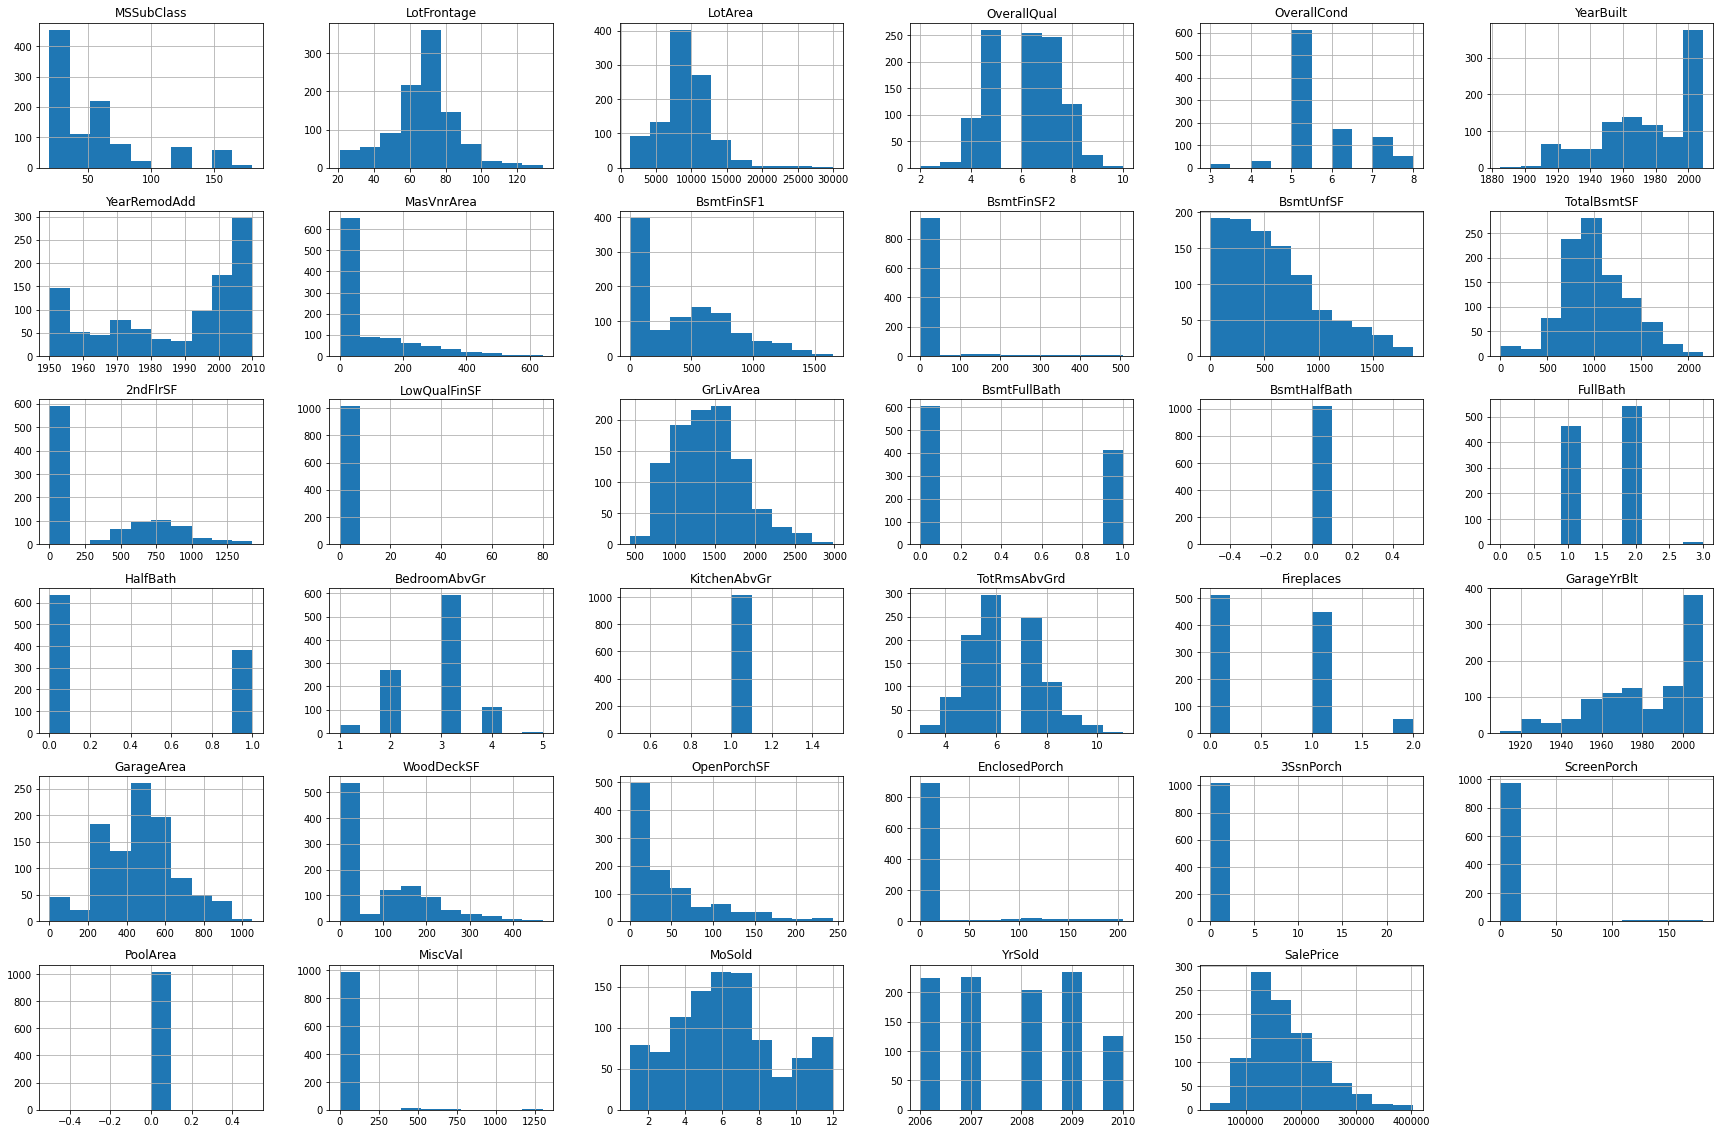

In [13]:
df2.hist(figsize=(30,20))
plt.show()

In [14]:
continuous = df2.columns[df2.dtypes != 'object']
topic =[]
skew = []
log = []
sqrt = []
cbrt=[]
for i in continuous:
    topic.append(i)
    skew.append(df2[i].skew())
    log_t = np.log(df2[i])
    log.append(log_t.skew())
    sq_t = np.sqrt(df2[i])
    sqrt.append(sq_t.skew())
    cb_t = np.cbrt(df2[i])
    cbrt.append(cb_t.skew())
    

df22 = pd.DataFrame(list(zip(topic,skew,log,sqrt,cbrt)),columns =['Attribute', 'skew','log','sqrt','cbrt'])
df22

,Attribute,skew,log,sqrt,cbrt
0,MSSubClass,1.392560,0.326711,0.814586,0.636131
1,LotFrontage,-0.023734,-1.459096,-0.737468,-0.977856
2,LotArea,0.762159,-1.312059,-0.327540,-0.664131
3,OverallQual,0.057005,-0.637805,-0.252060,-0.369523
4,OverallCond,0.787168,0.088744,0.480256,0.360352
5,YearBuilt,-0.643144,-0.664017,-0.653544,-0.657027
6,YearRemodAdd,-0.592900,-0.599990,-0.596443,-0.597625
7,MasVnrArea,1.677289,NaN,0.868826,0.644422
8,BsmtFinSF1,0.605783,NaN,-0.108802,-0.333805
9,BsmtFinSF2,4.479309,NaN,3.669548,3.451910


In [15]:
df2['MSSubClass'] = list(np.log(df2['MSSubClass']))
df2['LotArea'] = list(np.sqrt(df2['LotArea']))
df2['OverallCond'] = list(np.log(df2['OverallCond']))
df2['MasVnrArea'] = list(np.cbrt(df2['MasVnrArea']))
df2['BsmtFinSF1'] = list(np.sqrt(df2['BsmtFinSF1']))
df2['BsmtFinSF2'] = list(np.cbrt(df2['BsmtFinSF2']))
df2['BsmtUnfSF'] = list(np.sqrt(df2['BsmtUnfSF']))
df2['2ndFlrSF'] = list(np.cbrt(df2['2ndFlrSF']))
df2['GrLivArea'] = list(np.sqrt(df2['GrLivArea']))
df2['TotRmsAbvGrd'] = list(np.sqrt(df2['TotRmsAbvGrd']))
df2['Fireplaces'] = list(np.cbrt(df2['Fireplaces']))
df2['WoodDeckSF'] = list(np.cbrt(df2['WoodDeckSF']))
df2['OpenPorchSF'] = list(np.cbrt(df2['OpenPorchSF']))
df2['MiscVal'] = list(np.cbrt(df2['MiscVal']))
df2['SalePrice'] = list(np.cbrt(df2['SalePrice']))

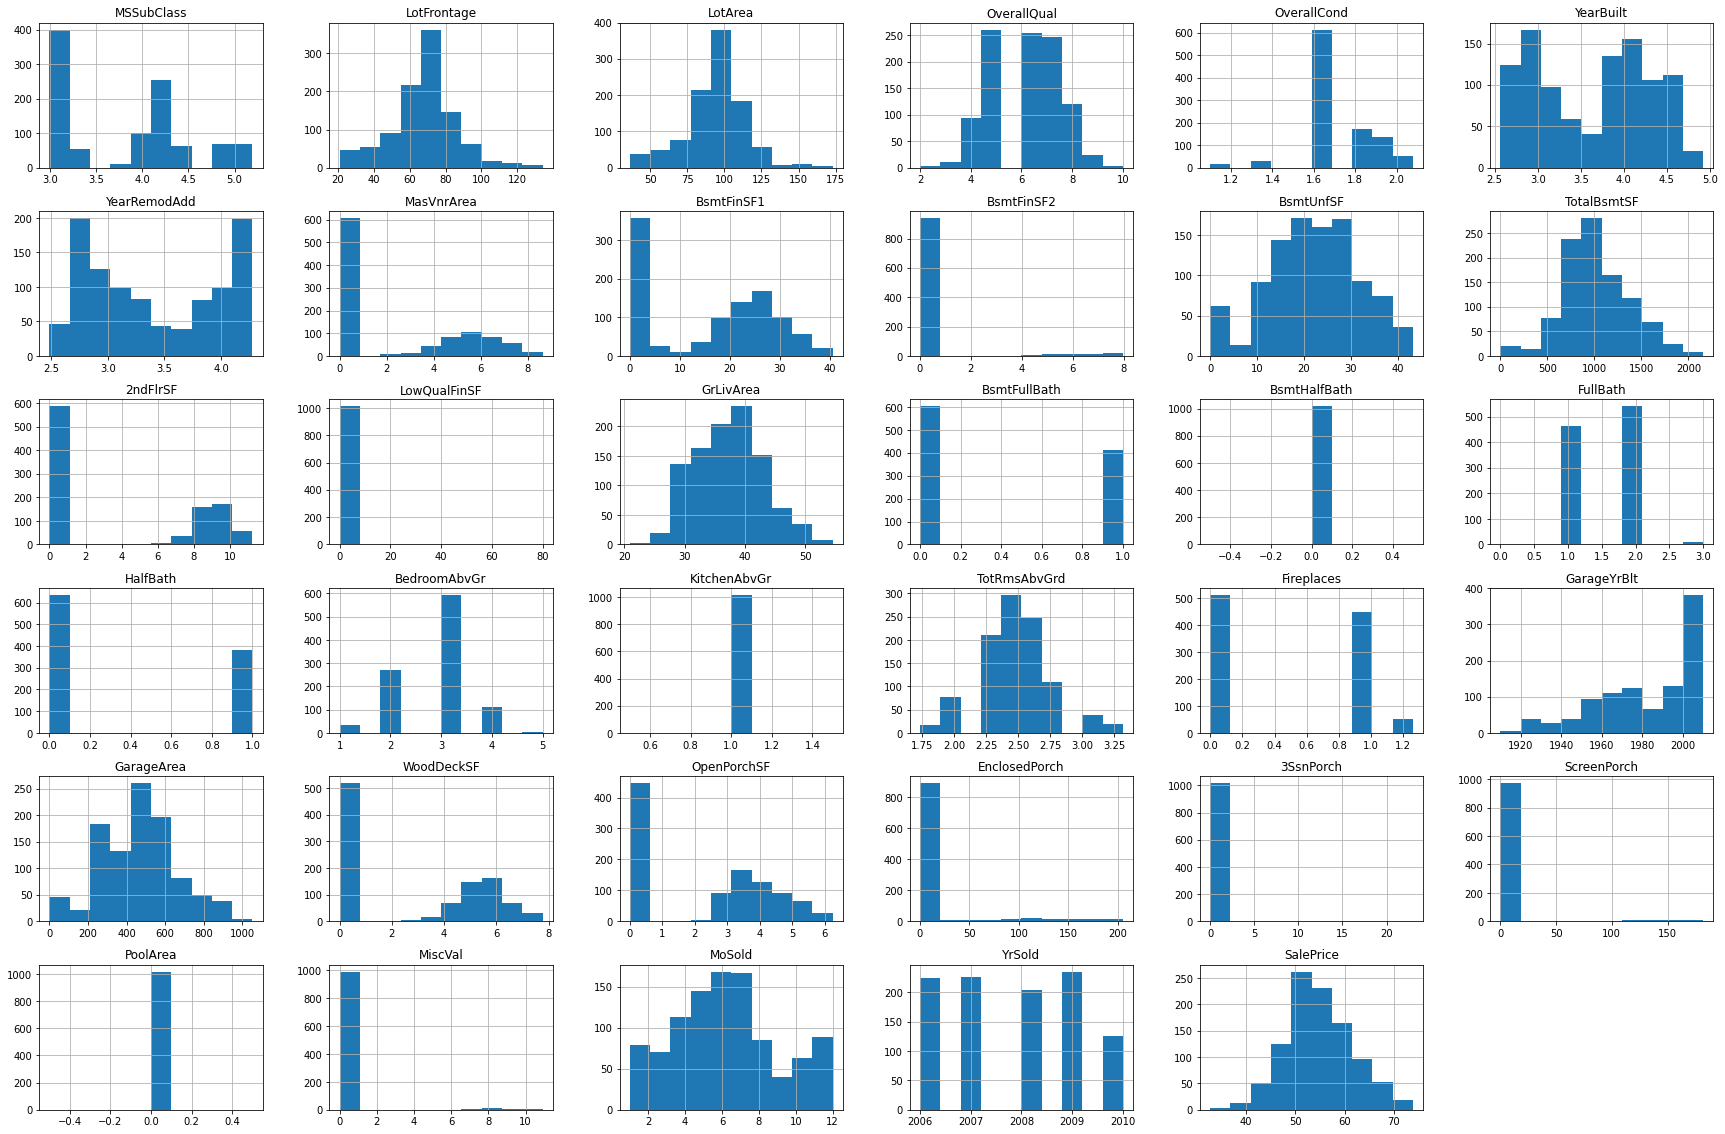

In [16]:
df2['YearBuilt'] = 2022 - df2['YearBuilt']
df2['YearRemodAdd'] = 2022 - df2['YearRemodAdd']
df2['YearBuilt'] = list(np.log(df2['YearBuilt']))
df2['YearRemodAdd'] = list(np.log(df2['YearRemodAdd']))
df2.hist(figsize=(30,20))
plt.show()

<h2> Feature Selection and Engineering </h2>

<h3> For Continuous Attributes</h3>
<p> Select those attributes that have high correlation with the dependent variable (coefficient value higher than 0.5) </p>

In [17]:
continuous_cols = list(df2.corr()["SalePrice"][(df2.corr()["SalePrice"]>0.50) | (df2.corr()["SalePrice"]<-0.50)].index)
print("Attributes Selected:- \n")
for i in continuous_cols:
    print(i)

Attributes Selected:- 

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageArea
SalePrice


<h3> For Categorical Attributes </h3>

In [18]:
cat_cols = df2.columns[df2.dtypes == 'object']
cat_cols = list(cat_cols)
len(cat_cols)

38

In [19]:
df1 = df2[cat_cols]
df1 = pd.get_dummies(df1, columns=cat_cols)
df1.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
x = df1.loc[:,'MSZoning_C (all)':'SaleCondition_Partial']
y = df2['SalePrice'] 

In [21]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=40)
train_new = selector.fit_transform(x, y)
mask = selector.get_support()
new_features = x.columns[mask]
cat_cols2 = list(new_features)
print(cat_cols2,len(cat_cols2))

['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_Somerst', 'HouseStyle_2Story', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_NA', 'GarageQual_TA', 'GarageCond_NA', 'GarageCond_TA', 'SaleType_New', 'SaleCondition_Partial'] 40


In [22]:
categorical_high_corr = []
for ftr in cat_cols2:
    if ftr not in cat_cols:
        categorical_high_corr.append((ftr.split("_")[0]))
categorical_high_corr = set(categorical_high_corr)
categorical_high_corr = list(categorical_high_corr)
print(categorical_high_corr, len(categorical_high_corr))

['Foundation', 'HeatingQC', 'SaleType', 'CentralAir', 'MSZoning', 'Exterior2nd', 'BsmtQual', 'Exterior1st', 'Electrical', 'HouseStyle', 'KitchenQual', 'BsmtFinType1', 'GarageCond', 'Neighborhood', 'GarageType', 'GarageFinish', 'LotShape', 'ExterQual', 'GarageQual', 'MasVnrType', 'SaleCondition'] 21


<h3> Update the dataset</h3>

In [23]:
selected_cols = continuous_cols+categorical_high_corr 
selected_cols 

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageArea',
 'SalePrice',
 'Foundation',
 'HeatingQC',
 'SaleType',
 'CentralAir',
 'MSZoning',
 'Exterior2nd',
 'BsmtQual',
 'Exterior1st',
 'Electrical',
 'HouseStyle',
 'KitchenQual',
 'BsmtFinType1',
 'GarageCond',
 'Neighborhood',
 'GarageType',
 'GarageFinish',
 'LotShape',
 'ExterQual',
 'GarageQual',
 'MasVnrType',
 'SaleCondition']

In [24]:
df3 = df2[selected_cols]
df3

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice,Foundation,...,BsmtFinType1,GarageCond,Neighborhood,GarageType,GarageFinish,LotShape,ExterQual,GarageQual,MasVnrType,SaleCondition
0,7,2.944439,2.944439,856,41.352146,2,2.828427,548,59.297359,PConc,...,GLQ,TA,CollgCr,Attchd,RFn,Reg,Gd,TA,BrkFace,Normal
2,7,3.044522,2.995732,920,42.261093,2,2.449490,608,60.686558,PConc,...,GLQ,TA,CollgCr,Attchd,RFn,IR1,Gd,TA,BrkFace,Normal
4,8,3.091042,3.091042,1145,46.882833,2,3.000000,836,62.996052,PConc,...,GLQ,TA,NoRidge,Attchd,RFn,IR1,Gd,TA,BrkFace,Normal
6,8,2.890372,2.833213,1686,41.158231,2,2.645751,636,67.459967,PConc,...,GLQ,TA,Somerst,Attchd,RFn,Reg,Gd,TA,Stone,Normal
10,5,4.043051,4.043051,1040,32.249031,1,2.236068,384,50.592941,CBlock,...,Rec,TA,Sawyer,Detchd,Unf,Reg,TA,TA,None,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,5,2.833213,2.833213,547,32.741411,1,2.236068,525,52.535879,PConc,...,GLQ,TA,Edwards,Basment,Fin,Reg,TA,TA,BrkFace,Normal
1453,5,2.772589,2.772589,1140,33.763886,1,2.449490,0,43.881915,PConc,...,Unf,NA,Mitchel,NA,NA,Reg,TA,NA,None,Abnorml
1454,7,2.890372,2.833213,1221,34.942810,2,2.449490,400,56.980192,PConc,...,GLQ,TA,Somerst,Attchd,RFn,Reg,Gd,TA,None,Normal
1455,6,3.135494,3.091042,953,40.583248,2,2.645751,460,55.934447,PConc,...,Unf,TA,Gilbert,Attchd,RFn,Reg,TA,TA,None,Normal


<h3> Scaling and Encoding </h3>

In [25]:
X = df3.drop("SalePrice", axis=1)
y = df3["SalePrice"]

In [26]:
X = pd.get_dummies(df3, columns=categorical_high_corr)
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice,Foundation_BrkTil,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2.944439,2.944439,856,41.352146,2,2.828427,548,59.297359,0,...,0,1,0,0,0,0,0,0,1,0
2,7,3.044522,2.995732,920,42.261093,2,2.449490,608,60.686558,0,...,0,1,0,0,0,0,0,0,1,0
4,8,3.091042,3.091042,1145,46.882833,2,3.000000,836,62.996052,0,...,0,1,0,0,0,0,0,0,1,0
6,8,2.890372,2.833213,1686,41.158231,2,2.645751,636,67.459967,0,...,0,0,0,1,0,0,0,0,1,0
10,5,4.043051,4.043051,1040,32.249031,1,2.236068,384,50.592941,0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
scaler = StandardScaler()
continuous_cols.remove("SalePrice")
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Modelling </h2>
<p> Use MAE, MSE, RMSE and R- square for checking error and accuracy </p>
<p> Use RandomizedSearchCV for Hyperparameter Tuning </p>


In [28]:
def evaluation(y_hat, predictions):
    mae = mean_absolute_error(y_hat, predictions)
    mse = mean_squared_error(y_hat, predictions)
    rmse = np.sqrt(mean_squared_error(y_hat, predictions))
    r_squared = r2_score(y_hat, predictions)
    return mae, mse, rmse, r_squared

<h3> 1. Decision Tree Regressor </h3>

Best Accuracy = 0.9983221690992018 
Best Parameters = {'splitter': 'best', 'max_features': 'auto', 'criterion': 'friedman_mse'} 
--------------------------------------------------
MAE: 0.10272866725925876
MSE: 0.12288993011802153
RMSE: 0.3505566004485175
R2 Score: 0.9971072066407101
--------------------------------------------------


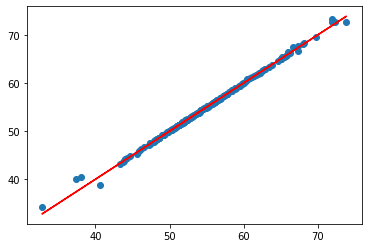

In [29]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best','random']
max_features = ['auto', 'sqrt', 'log2']
max_features.append(None)
param_grid = dict(max_features=max_features,criterion=criterion,splitter=splitter)
randcvdt = RandomizedSearchCV(dt, param_grid, cv=10, n_iter=10,n_jobs = 1, verbose = 0, random_state=42)
randcvdt = randcvdt.fit(X_train,y_train)
randcvdt.cv_results_
print("Best Accuracy = {Accuracy} ".format(Accuracy = randcvdt.best_score_))
print("Best Parameters = {Parameters} ".format(Parameters = randcvdt.best_params_))
print("-"*50)
predictions = randcvdt.predict(X_test)
mae1, mse1, rmse1, r_squared1 = evaluation(y_test, predictions)
print("MAE:", mae1)
print("MSE:", mse1)
print("RMSE:", rmse1)
print("R2 Score:", r_squared1)
print("-"*50)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

<h3> 2. Random Forrest Regressor </h3>

Best Accuracy = 0.9982384150276211 
Best Parameters = {'oob_score': True, 'n_estimators': 234, 'max_features': 'auto', 'bootstrap': True} 
--------------------------------------------------
MAE: 0.06228756131870894
MSE: 0.09819073371898686
RMSE: 0.3133540070255794
R2 Score: 0.9976886185696965
--------------------------------------------------


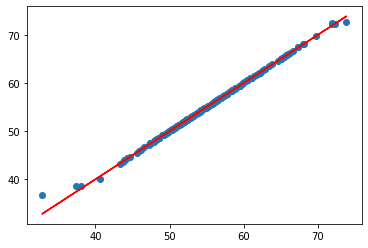

In [30]:
n_estimators = list(range(1,500))
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True]
oob_score =[True,False]
param_grid = dict(n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap,oob_score=oob_score)
knn=RandomForestRegressor()
randcv = RandomizedSearchCV(knn, param_grid, cv=10, n_jobs = 1, verbose = 0, n_iter=10, random_state=42)
randcv.fit(X_train, y_train)
randcv.cv_results_
print("Best Accuracy = {Accuracy} ".format(Accuracy = randcv.best_score_))
print("Best Parameters = {Parameters} ".format(Parameters = randcv.best_params_))
print("-"*50)
predictions = randcv.predict(X_test)
mae2, mse2, rmse2, r_squared2 = evaluation(y_test, predictions)
print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2 Score:", r_squared2)
print("-"*50)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

<h3> 3. Extra Tree Regressor </h3>

Best Accuracy = 0.9953650434470218 
Best Parameters = {'oob_score': True, 'n_estimators': 431, 'max_features': 'auto', 'bootstrap': True} 
--------------------------------------------------
MAE: 0.14719404333429043
MSE: 0.22376015071973035
RMSE: 0.47303292773308114
R2 Score: 0.9947327508653141
--------------------------------------------------


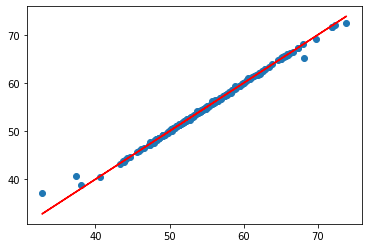

In [31]:
n_estimators = list(range(1,500))
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True]
oob_score =[True,False]
param_grid = dict(n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap,oob_score=oob_score)
eta = ExtraTreesRegressor()
randcveta = RandomizedSearchCV(eta, param_grid, cv=10, n_jobs = 1, verbose = 0, n_iter=10, random_state=42)
randcveta.fit(X_train, y_train)
randcveta.cv_results_
print("Best Accuracy = {Accuracy} ".format(Accuracy = randcveta.best_score_))
print("Best Parameters = {Parameters} ".format(Parameters = randcveta.best_params_))
print("-"*50)
predictions = randcveta.predict(X_test)
mae3, mse3, rmse3, r_squared3 = evaluation(y_test, predictions)
print("MAE:", mae3)
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2 Score:", r_squared3)
print("-"*50)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

<h3> 4. Gradient Boosting Regressor </h3>

Best Accuracy = 0.9986088194611613 
Best Parameters = {'n_estimators': 467, 'loss': 'squared_error', 'criterion': 'friedman_mse'} 
--------------------------------------------------
MAE: 0.061854216029844526
MSE: 0.015253953203169355
RMSE: 0.12350689536689584
R2 Score: 0.9996409263599819
--------------------------------------------------


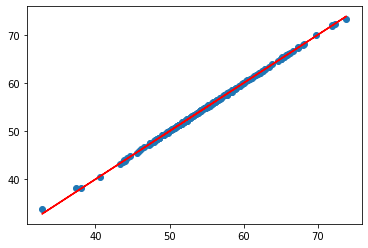

In [32]:
n_estimators = list(range(1,500))
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
criterion = ['friedman_mse','squared_error','mse']
param_grid = dict(n_estimators=n_estimators,loss=loss,criterion=criterion)
gbr = GradientBoostingRegressor()
randcvgbr = RandomizedSearchCV(gbr, param_grid, cv=10, n_jobs = 1, verbose = 0, n_iter=10, random_state=42)
randcvgbr.fit(X_train, y_train)
randcvgbr.cv_results_
print("Best Accuracy = {Accuracy} ".format(Accuracy = randcvgbr.best_score_))
print("Best Parameters = {Parameters} ".format(Parameters = randcvgbr.best_params_))
print("-"*50)
predictions = randcvgbr.predict(X_test)
mae4, mse4, rmse4, r_squared4 = evaluation(y_test, predictions)
print("MAE:", mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("R2 Score:", r_squared4)
print("-"*50)
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')

<h3> Analysing the Results </h3>

In [53]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
line = ['black',]*4
width =[1.5,]*4
fig = make_subplots(rows=2, cols=2, shared_yaxes=False,subplot_titles=("MAE","MSE", "RMSE","R-Squared"))

fig.add_trace(go.Bar(x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'], y=[mae1,mae2,mae3,mae4],
                    name = 'MAE', marker_color=colors,marker_line_color=line,
                  marker_line_width=width, opacity=0.6),
              1, 1)
fig.add_trace(go.Scatter(
    x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'],
    y=[mae1,mae2,mae3,mae4],
    name='mae',line=dict(color='black')
),1, 1)
fig.add_trace(go.Bar(x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'], y=[mse1,mse2,mse3,mse4],
                    name='MSE', marker_color=colors,marker_line_color=line,
                  marker_line_width=width, opacity=0.6),
              1, 2)
fig.add_trace(go.Scatter(
    x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'],
    y=[mse1,mse2,mse3,mse4],
    name='mse',line=dict(color='black')
),1, 2)
fig.add_trace(go.Bar(x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'], y=[rmse1,rmse2,rmse3,rmse4],name='RMSE', marker_color=colors,marker_line_color=line,
                  marker_line_width=width, opacity=0.6),
              2, 1)
fig.add_trace(go.Scatter(
    x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'],
    y=[rmse1,rmse2,rmse3,rmse4],
    name='rmse',line=dict(color='black')
),2, 1)
fig.add_trace(go.Bar(x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'], y=[r_squared1*100,r_squared2*100,r_squared3*100,r_squared4*100],
                     name="R-squared", marker_color=colors,marker_line_color=line,
                  marker_line_width=width, opacity=0.6),
              2, 2)

fig.add_trace(go.Scatter(
    x=['Decision Tree','Random Forrest','Extra Tree','Gradient Boosting'],
    y=[r_squared1*100,r_squared2*100,r_squared3*100,r_squared4*100],
    name='r_squared',line=dict(color='black')
),2, 2)
fig.update_layout(showlegend=False,title_text="Results")
fig.show()

<h3> Therefore after analysing the results, we choose the gradient boosting model</h3>

In [55]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(randcvgbr, open(filename, 'wb'))